In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
food = pd.read_csv("/content/drive/MyDrive/NOTES/data/Indian-Resturants.csv")

In [ ]:
food

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [ ]:
food.shape

(211944, 26)

In [ ]:
food.drop_duplicates(inplace = True)

In [ ]:
food.shape

(60417, 26)

In [ ]:
food.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [ ]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60417 entries, 0 to 211942
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                60417 non-null  int64  
 1   name                  60417 non-null  object 
 2   establishment         60417 non-null  object 
 3   url                   60417 non-null  object 
 4   address               60399 non-null  object 
 5   city                  60417 non-null  object 
 6   city_id               60417 non-null  int64  
 7   locality              60417 non-null  object 
 8   latitude              60417 non-null  float64
 9   longitude             60417 non-null  float64
 10  zipcode               12548 non-null  object 
 11  country_id            60417 non-null  int64  
 12  locality_verbose      60417 non-null  object 
 13  cuisines              59947 non-null  object 
 14  timings               59347 non-null  object 
 15  average_cost_for_two  6

In [ ]:
food.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,6.041700e+04,60417.000000,60417.000000,60417.000000,60417.0,60417.000000,60417.000000,60417.000000,60417.000000,60417.000000,60398.0,60417.000000,60417.0
mean,1.309335e+07,3418.302183,21.349431,76.588040,1.0,538.304517,1.730821,3.032868,261.574888,194.247414,0.0,-0.371799,-1.0
std,8.132809e+06,5179.351720,41.187998,10.600514,0.0,593.852227,0.880462,1.440751,728.284194,705.682451,0.0,0.925249,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.000488e+06,7.000000,16.324755,74.654029,1.0,200.000000,1.000000,2.900000,7.000000,1.000000,0.0,-1.000000,-1.0
50%,1.869150e+07,26.000000,22.320884,77.135310,1.0,400.000000,1.000000,3.500000,42.000000,11.000000,0.0,-1.000000,-1.0
75%,1.886666e+07,11295.000000,26.744389,79.928190,1.0,600.000000,2.000000,4.000000,207.000000,82.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [ ]:
#rest_id , locality , city , cuisines , timings , average_cost_for_two' , aggregate_rating , votes ,

In [ ]:
f = food.copy()

In [ ]:
f

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,['Dessert Parlour'],https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,...,1,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1,0.0,1,-1
211925,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211926,18019952,Geeta lodge,['Casual Dining'],https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,...,1,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1


In [ ]:
f= f.drop(['establishment','url', 'address','city_id', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'currency', 'photo_count','opentable_support',
       'takeaway'], axis = 1)

<Axes: >

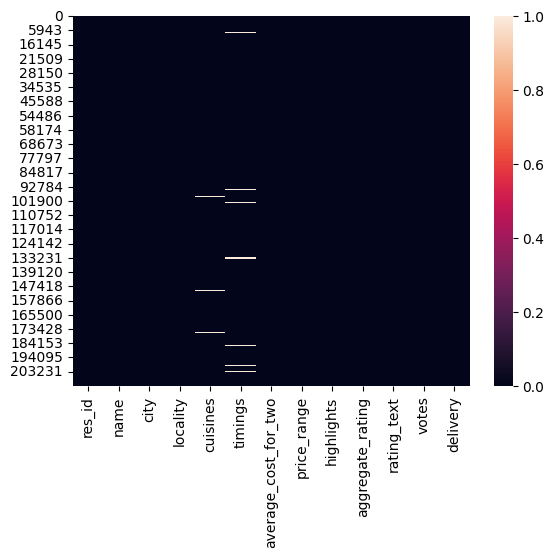

In [ ]:
sns.heatmap(f.isnull())

In [ ]:
f

,res_id,name,city,locality,cuisines,timings,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,delivery
0,3400299,Bikanervala,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,-1
1,3400005,Mama Chicken Mama Franky House,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,-1
2,3401013,Bhagat Halwai,Agra,Shahganj,"Fast Food, Mithai",9:30 AM to 11 PM,300,1,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,1
3,3400290,Bhagat Halwai,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,1,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,1
4,3401744,The Salt Cafe Kitchen & Bar,Agra,Tajganj,"North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,3,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,Vadodara,Manjalpur,Ice Cream,11 AM to 12 Midnight,200,1,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1
211925,18984164,The Grand Thakar,Vadodara,Alkapuri,"Gujarati, North Indian, Chinese","11:30 AM to 3:30 PM, 7:30 PM to 11 PM",700,2,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,-1
211926,18019952,Geeta lodge,Vadodara,Alkapuri,"Gujarati, Street Food","11 AM to 3:30 PM, 7 PM to 10:30 PM",250,1,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,-1
211940,3200996,Raju Omlet,Vadodara,Karelibaug,Fast Food,"4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm...",300,1,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,1


In [ ]:
f.drop_duplicates(inplace = True)

In [ ]:
f.shape

(60298, 13)

In [ ]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60298 entries, 0 to 211942
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                60298 non-null  int64  
 1   name                  60298 non-null  object 
 2   city                  60298 non-null  object 
 3   locality              60298 non-null  object 
 4   cuisines              59828 non-null  object 
 5   timings               59228 non-null  object 
 6   average_cost_for_two  60298 non-null  int64  
 7   price_range           60298 non-null  int64  
 8   highlights            60298 non-null  object 
 9   aggregate_rating      60298 non-null  float64
 10  rating_text           60298 non-null  object 
 11  votes                 60298 non-null  int64  
 12  delivery              60298 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 6.4+ MB


In [ ]:
f.describe()

,res_id,average_cost_for_two,price_range,aggregate_rating,votes,delivery
count,6.029800e+04,60298.000000,60298.000000,60298.000000,60298.000000,60298.000000
mean,1.309278e+07,536.792166,1.728996,3.030494,258.135709,-0.371919
std,8.132551e+06,592.146109,0.879307,1.440949,715.993925,0.925195
min,5.000000e+01,0.000000,1.000000,0.000000,-18.000000,-1.000000
25%,3.000531e+06,200.000000,1.000000,2.900000,7.000000,-1.000000
50%,1.869167e+07,400.000000,1.000000,3.500000,41.000000,-1.000000
75%,1.886680e+07,600.000000,2.000000,3.900000,205.000000,1.000000
max,1.915979e+07,30000.000000,4.000000,4.900000,42539.000000,1.000000


In [ ]:
f.isnull().sum()

,0
res_id,0
name,0
city,0
locality,0
cuisines,470
timings,1070
average_cost_for_two,0
price_range,0
highlights,0
aggregate_rating,0


In [ ]:
f.isnull().sum().sum()

1540

In [ ]:
f['delivery'].replace(-1,1, inplace=True)

<ipython-input-23-eeed7973503c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  f['delivery'].replace(-1,1, inplace=True)


In [ ]:
f

,res_id,name,city,locality,cuisines,timings,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,delivery
0,3400299,Bikanervala,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,1
1,3400005,Mama Chicken Mama Franky House,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,1
2,3401013,Bhagat Halwai,Agra,Shahganj,"Fast Food, Mithai",9:30 AM to 11 PM,300,1,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,1
3,3400290,Bhagat Halwai,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,1,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,1
4,3401744,The Salt Cafe Kitchen & Bar,Agra,Tajganj,"North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,3,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,Vadodara,Manjalpur,Ice Cream,11 AM to 12 Midnight,200,1,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1
211925,18984164,The Grand Thakar,Vadodara,Alkapuri,"Gujarati, North Indian, Chinese","11:30 AM to 3:30 PM, 7:30 PM to 11 PM",700,2,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,1
211926,18019952,Geeta lodge,Vadodara,Alkapuri,"Gujarati, Street Food","11 AM to 3:30 PM, 7 PM to 10:30 PM",250,1,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,1
211940,3200996,Raju Omlet,Vadodara,Karelibaug,Fast Food,"4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm...",300,1,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,1


In [ ]:
f.isnull().sum()

,0
res_id,0
name,0
city,0
locality,0
cuisines,470
timings,1070
average_cost_for_two,0
price_range,0
highlights,0
aggregate_rating,0


In [ ]:
f.isnull().sum().sum()

1540

In [ ]:
f.dtypes

,0
res_id,int64
name,object
city,object
locality,object
cuisines,object
timings,object
average_cost_for_two,int64
price_range,int64
highlights,object
aggregate_rating,float64


In [ ]:
(f.isnull().sum()/f.shape[0])*100

,0
res_id,0.000000
name,0.000000
city,0.000000
locality,0.000000
cuisines,0.779462
timings,1.774520
average_cost_for_two,0.000000
price_range,0.000000
highlights,0.000000
aggregate_rating,0.000000


In [ ]:
f['timings'].mode()

,timings
0,11 AM to 11 PM


In [ ]:
f['timings'] = f['timings'].fillna('nan')

In [ ]:
f['timings'] = f['timings'].replace('nan', '11 AM to 11 PM')
f

,res_id,name,city,locality,cuisines,timings,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,delivery
0,3400299,Bikanervala,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,1
1,3400005,Mama Chicken Mama Franky House,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,1
2,3401013,Bhagat Halwai,Agra,Shahganj,"Fast Food, Mithai",9:30 AM to 11 PM,300,1,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,1
3,3400290,Bhagat Halwai,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,1,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,1
4,3401744,The Salt Cafe Kitchen & Bar,Agra,Tajganj,"North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,3,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,Vadodara,Manjalpur,Ice Cream,11 AM to 12 Midnight,200,1,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1
211925,18984164,The Grand Thakar,Vadodara,Alkapuri,"Gujarati, North Indian, Chinese","11:30 AM to 3:30 PM, 7:30 PM to 11 PM",700,2,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,1
211926,18019952,Geeta lodge,Vadodara,Alkapuri,"Gujarati, Street Food","11 AM to 3:30 PM, 7 PM to 10:30 PM",250,1,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,1
211940,3200996,Raju Omlet,Vadodara,Karelibaug,Fast Food,"4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm...",300,1,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,1


In [ ]:
f[f['cuisines'].isnull()].index.tolist()

[1140,
 7770,
 11389,
 11390,
 11406,
 13330,
 13917,
 13928,
 13929,
 13931,
 13937,
 13940,
 13946,
 13950,
 13959,
 13960,
 13961,
 13962,
 13963,
 13964,
 16072,
 16074,
 16638,
 18385,
 18397,
 28194,
 49848,
 49853,
 49877,
 49884,
 49887,
 49900,
 49907,
 49910,
 49912,
 49913,
 49924,
 49925,
 49933,
 49934,
 49937,
 50007,
 50019,
 50039,
 50042,
 50069,
 50463,
 51359,
 51803,
 59854,
 59929,
 59972,
 60010,
 60014,
 60043,
 60591,
 60643,
 61823,
 61850,
 61861,
 61863,
 61864,
 61872,
 61876,
 61877,
 61883,
 61885,
 61886,
 61891,
 61894,
 61896,
 61978,
 62008,
 67165,
 67377,
 69038,
 73268,
 73347,
 73350,
 73351,
 73399,
 73400,
 73438,
 73569,
 73588,
 73627,
 73636,
 73930,
 73947,
 74070,
 74080,
 74191,
 74212,
 74213,
 76287,
 80472,
 82752,
 82829,
 82998,
 82999,
 83013,
 83243,
 85058,
 85065,
 85070,
 85071,
 85074,
 85083,
 85085,
 85086,
 85088,
 85090,
 85091,
 85092,
 92682,
 95126,
 95208,
 95660,
 95666,
 95667,
 95669,
 95670,
 95676,
 95679,
 95680,
 9

In [ ]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60298 entries, 0 to 211942
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                60298 non-null  int64  
 1   name                  60298 non-null  object 
 2   city                  60298 non-null  object 
 3   locality              60298 non-null  object 
 4   cuisines              59828 non-null  object 
 5   timings               60298 non-null  object 
 6   average_cost_for_two  60298 non-null  int64  
 7   price_range           60298 non-null  int64  
 8   highlights            60298 non-null  object 
 9   aggregate_rating      60298 non-null  float64
 10  rating_text           60298 non-null  object 
 11  votes                 60298 non-null  int64  
 12  delivery              60298 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 6.4+ MB


In [ ]:
f.columns

Index(['res_id', 'name', 'city', 'locality', 'cuisines', 'timings',
       'average_cost_for_two', 'price_range', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'delivery'],
      dtype='object')

In [ ]:
f.describe()

,res_id,average_cost_for_two,price_range,aggregate_rating,votes,delivery
count,6.029800e+04,60298.000000,60298.000000,60298.000000,60298.000000,60298.000000
mean,1.309278e+07,536.792166,1.728996,3.030494,258.135709,0.994295
std,8.132551e+06,592.146109,0.879307,1.440949,715.993925,0.075316
min,5.000000e+01,0.000000,1.000000,0.000000,-18.000000,0.000000
25%,3.000531e+06,200.000000,1.000000,2.900000,7.000000,1.000000
50%,1.869167e+07,400.000000,1.000000,3.500000,41.000000,1.000000
75%,1.886680e+07,600.000000,2.000000,3.900000,205.000000,1.000000
max,1.915979e+07,30000.000000,4.000000,4.900000,42539.000000,1.000000


In [ ]:
f['timings']

,timings
0,8:30am – 10:30pm (Mon-Sun)
1,"12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat..."
2,9:30 AM to 11 PM
3,8am – 11pm (Mon-Sun)
4,11:30 AM to 11:30 PM
...,...
211882,11 AM to 12 Midnight
211925,"11:30 AM to 3:30 PM, 7:30 PM to 11 PM"
211926,"11 AM to 3:30 PM, 7 PM to 10:30 PM"
211940,"4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm..."


In [ ]:
f['cuisines'].mode()

,cuisines
0,North Indian


In [ ]:
f['cuisines'].unique()

array(['North Indian, South Indian, Mithai, Street Food, Desserts',
       'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food',
       'Fast Food, Mithai', ...,
       'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai',
       'North Indian, Chinese, Mexican, Italian, Thai, Continental',
       'North Indian, Lucknowi, Chinese'], dtype=object)

In [ ]:
f['cuisines'].fillna('cuisines is not specified', inplace=True)

<ipython-input-39-5abd26566406>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  f['cuisines'].fillna('cuisines is not specified', inplace=True)


In [ ]:
f.shape

(60298, 13)

In [ ]:
f.isnull().sum()/f.shape[0]*100

,0
res_id,0.0
name,0.0
city,0.0
locality,0.0
cuisines,0.0
timings,0.0
average_cost_for_two,0.0
price_range,0.0
highlights,0.0
aggregate_rating,0.0


In [ ]:
f.isnull().sum()

,0
res_id,0
name,0
city,0
locality,0
cuisines,0
timings,0
average_cost_for_two,0
price_range,0
highlights,0
aggregate_rating,0


In [ ]:
f.isnull().sum().sum()

0

<Axes: >

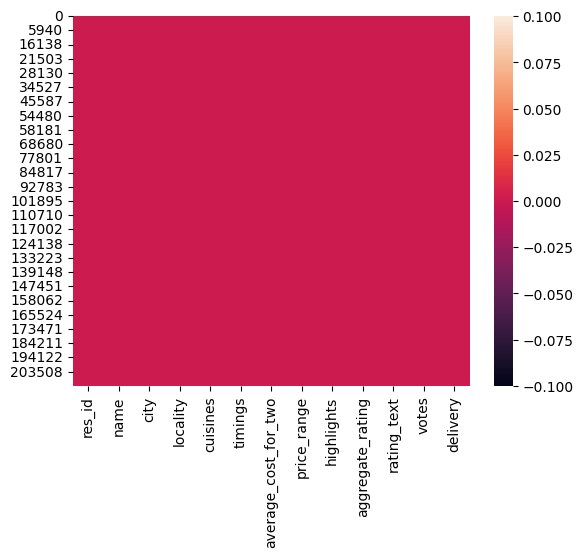

In [ ]:
sns.heatmap(f.isnull())

In [ ]:
f.columns

Index(['res_id', 'name', 'city', 'locality', 'cuisines', 'timings',
       'average_cost_for_two', 'price_range', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'delivery'],
      dtype='object')

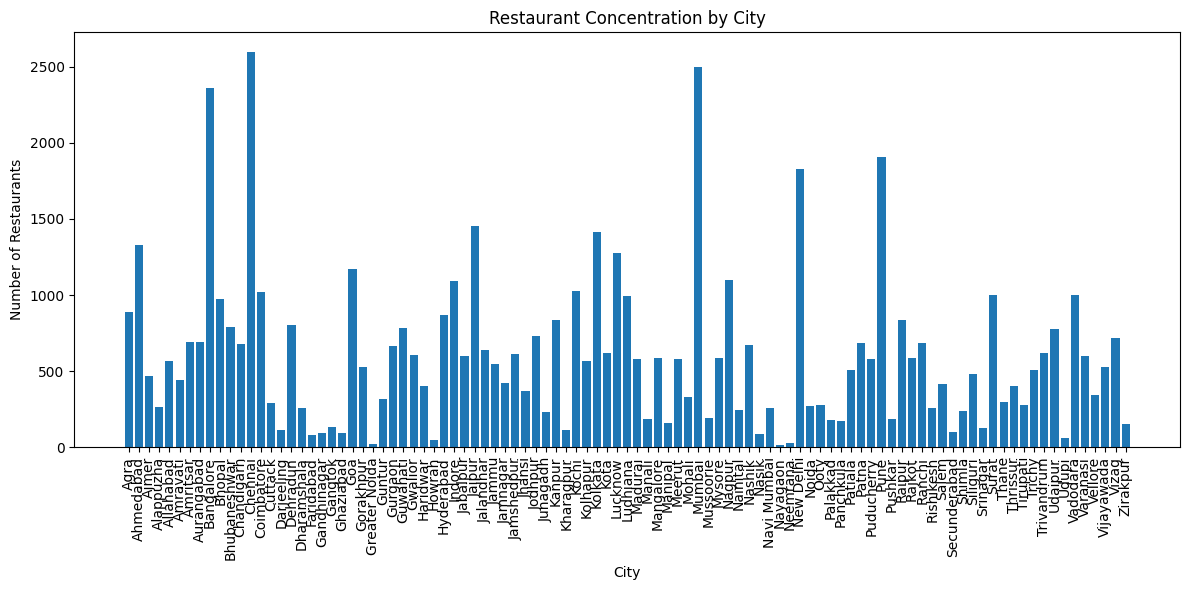

The city with the highest concentration of restaurants is: Chennai


In [ ]:
# Changed 'rest_id' to 'res_id' to match the actual column name
city_restaurant_counts = f.groupby('city')['res_id'].count()

# Find the city with the highest concentration of restaurants
city_with_highest_concentration = city_restaurant_counts.idxmax()

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(city_restaurant_counts.index, city_restaurant_counts.values)
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Restaurant Concentration by City')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

print(f"The city with the highest concentration of restaurants is: {city_with_highest_concentration}")

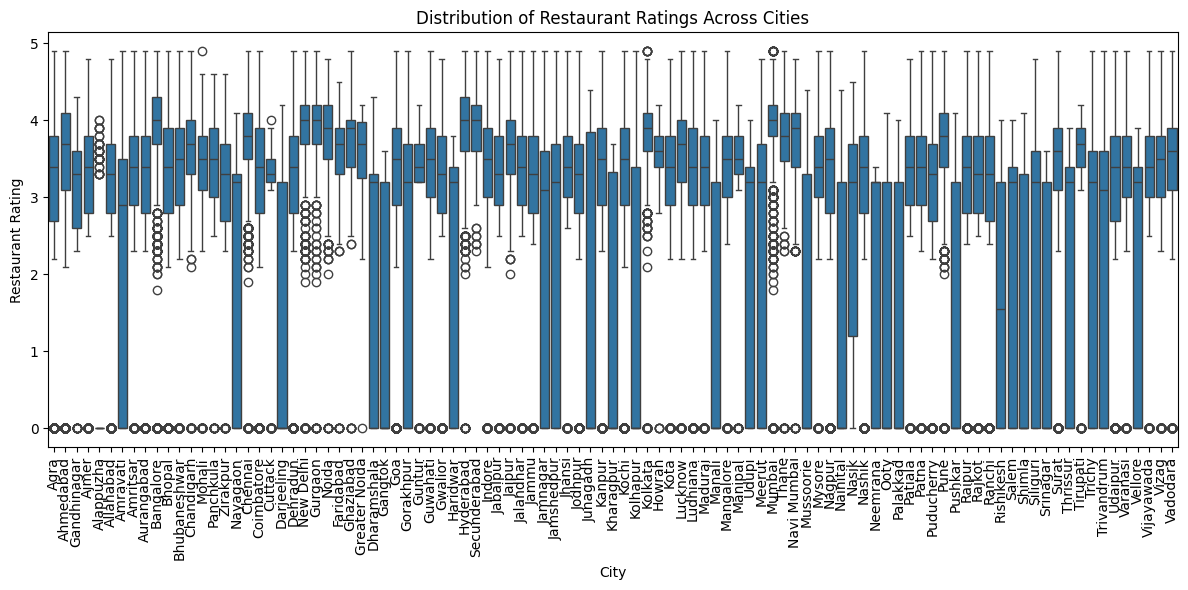

In [ ]:
# prompt:  Visualize the distribution of restaurant ratings across different cities \

plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='aggregate_rating', data=f)
plt.xlabel('City')
plt.ylabel('Restaurant Rating')
plt.title('Distribution of Restaurant Ratings Across Cities')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

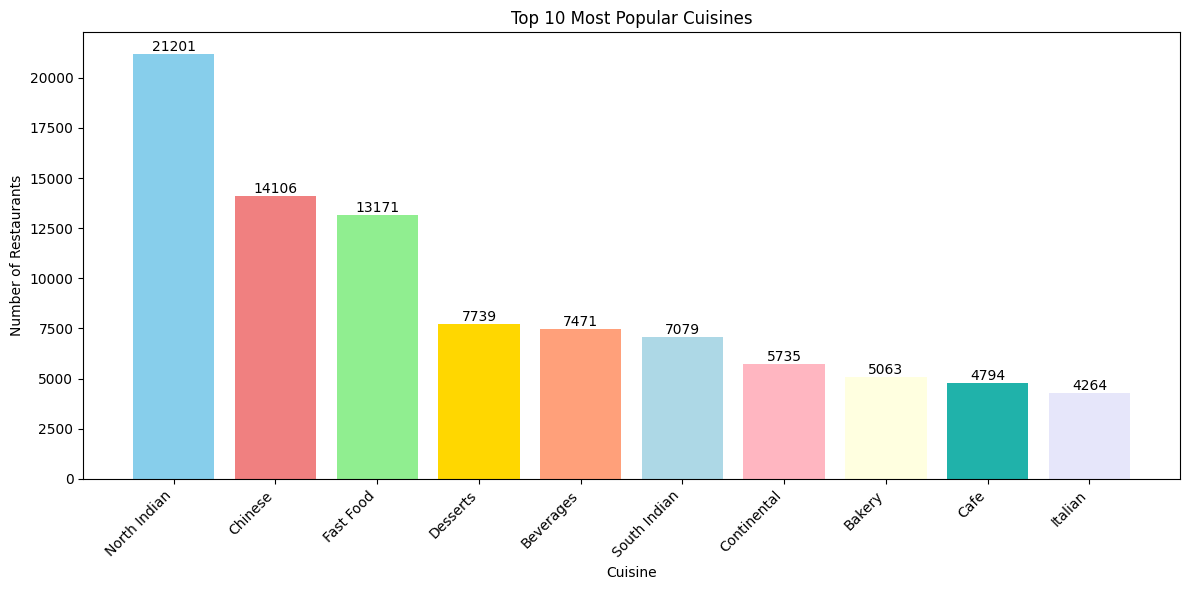

In [ ]:
# prompt: Determine the most popular cuisines among the listed restaurants. make a colourfull graph

# Assuming 'f' is your DataFrame containing restaurant data
cuisine_counts = f['cuisines'].str.split(', ', expand=True).stack().value_counts()

# Create a colorful bar graph of the top 10 most popular cuisines
top_10_cuisines = cuisine_counts.head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_cuisines.index, top_10_cuisines.values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightsalmon', 'lightblue', 'lightpink', 'lightyellow', 'lightseagreen', 'lavender'])
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.title('Top 10 Most Popular Cuisines')
plt.xticks(rotation=45, ha='right')

# Add data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

Correlation between Cuisine Variety and Aggregate Rating: 0.26392302501329984


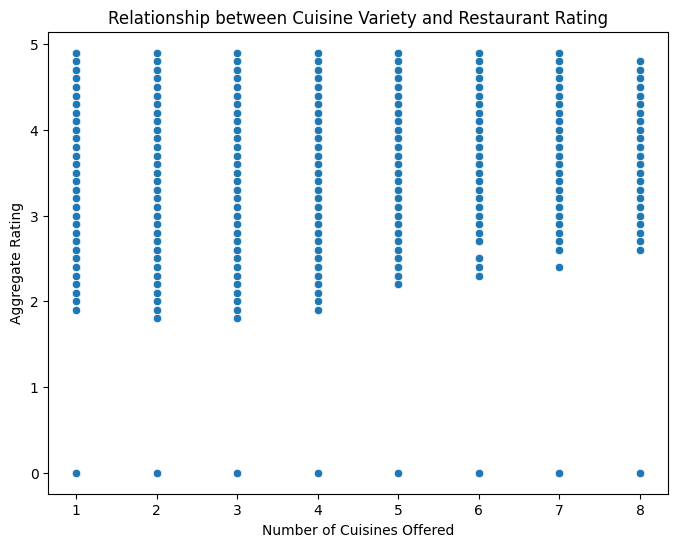

In [ ]:
# prompt: Investigate if there's a correlation between the variety of cuisines offered and
# restaurant ratings.

# Create a new column 'cuisine_count' representing the number of cuisines offered
f['cuisine_count'] = f['cuisines'].str.split(',').str.len()

# Calculate the correlation between cuisine_count and aggregate_rating
correlation = f['cuisine_count'].corr(f['aggregate_rating'])

print(f"Correlation between Cuisine Variety and Aggregate Rating: {correlation}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cuisine_count', y='aggregate_rating', data=f)
plt.xlabel('Number of Cuisines Offered')
plt.ylabel('Aggregate Rating')
plt.title('Relationship between Cuisine Variety and Restaurant Rating')
plt.show()

<ipython-input-50-0abb0979fa92>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='delivery', y='aggregate_rating', data=f, palette='Set2')


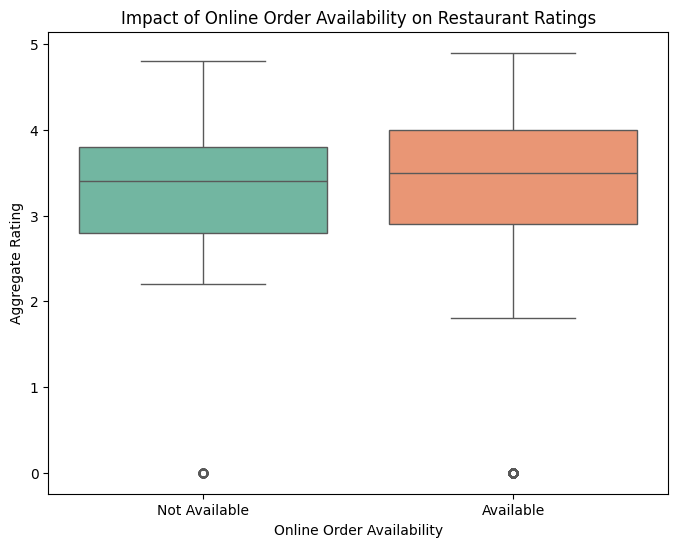

Average rating with online order availability: 3.0312723087700575
Average rating without online order availability: 2.894767441860465


<ipython-input-50-0abb0979fa92>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='delivery', y='aggregate_rating', data=f, palette='viridis')


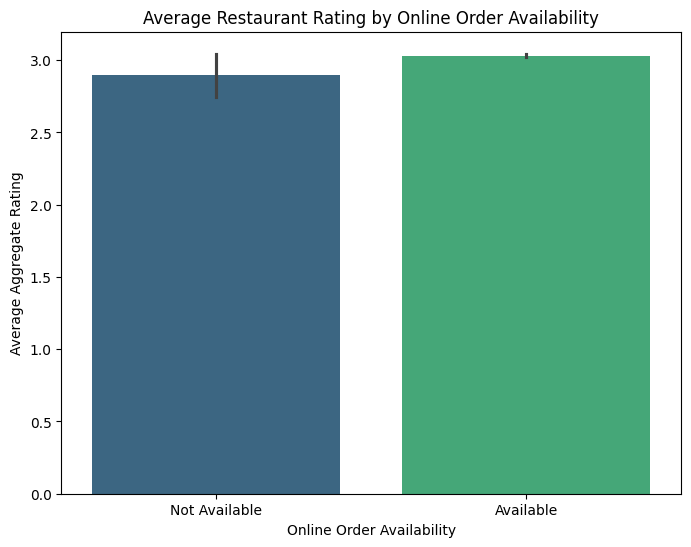

In [ ]:
# prompt: Investigate the impact of online order availability on restaurant ratings. make a colourfull graph

# Assuming 'f' is your DataFrame and you want to investigate the impact of online order availability
# (e.g., 'delivery' column) on restaurant ratings ('aggregate_rating').

plt.figure(figsize=(8, 6))
sns.boxplot(x='delivery', y='aggregate_rating', data=f, palette='Set2')
plt.xlabel('Online Order Availability')
plt.ylabel('Aggregate Rating')
plt.title('Impact of Online Order Availability on Restaurant Ratings')
plt.xticks([0, 1], ['Not Available', 'Available'])
plt.show()

# You can also calculate the average rating for restaurants with and without online order availability
average_rating_with_delivery = f[f['delivery'] == 1]['aggregate_rating'].mean()
average_rating_without_delivery = f[f['delivery'] == 0]['aggregate_rating'].mean()

print(f"Average rating with online order availability: {average_rating_with_delivery}")
print(f"Average rating without online order availability: {average_rating_without_delivery}")

# Further analysis could include:
# - T-test or ANOVA to determine statistical significance of the difference in ratings.
# - Examining the interaction between online order availability and other factors (e.g., cuisine, city) on ratings.

# Create a bar chart with a vibrant color palette
plt.figure(figsize=(8, 6))
sns.barplot(x='delivery', y='aggregate_rating', data=f, palette='viridis')
plt.xlabel('Online Order Availability')
plt.ylabel('Average Aggregate Rating')
plt.title('Average Restaurant Rating by Online Order Availability')
plt.xticks([0, 1], ['Not Available', 'Available'])
plt.show()

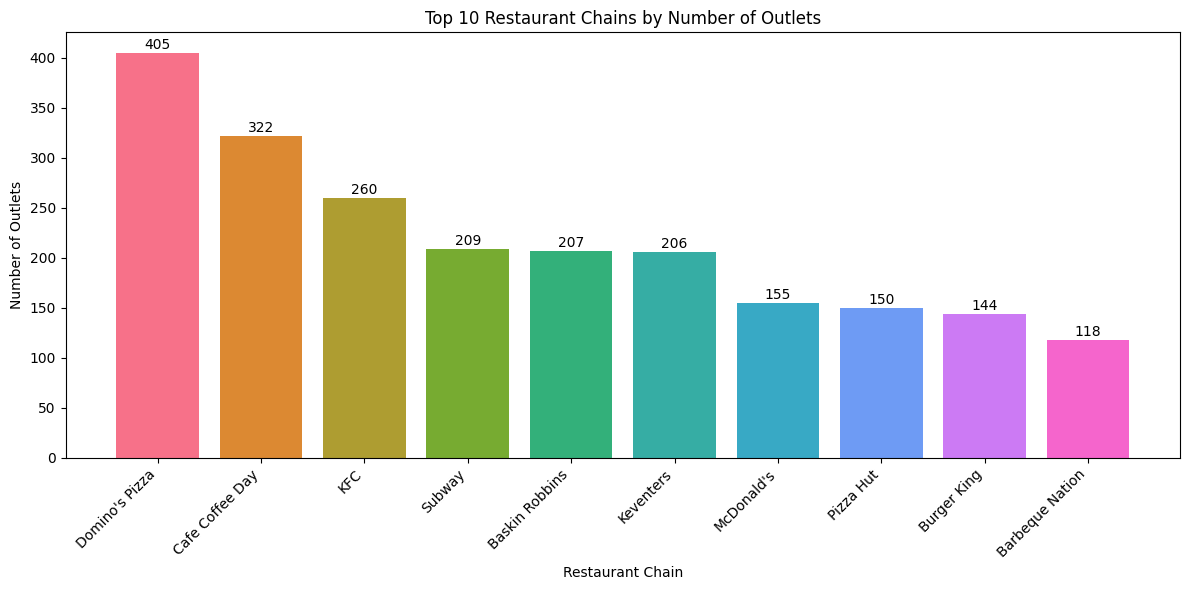

In [ ]:
# prompt: # Identify and visualize the top restaurant chains based on the number of outlets make a colourful graph

# Group by restaurant name and count the number of outlets
restaurant_counts = f.groupby('name')['res_id'].count().sort_values(ascending=False)

# Select the top 10 restaurant chains
top_10_chains = restaurant_counts.head(10)

# Create a bar chart with a vibrant color palette
plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(top_10_chains))  # Choose a vibrant color palette
bars = plt.bar(top_10_chains.index, top_10_chains.values, color=colors)

plt.xlabel('Restaurant Chain')
plt.ylabel('Number of Outlets')
plt.title('Top 10 Restaurant Chains by Number of Outlets')
plt.xticks(rotation=45, ha='right')

# Add data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

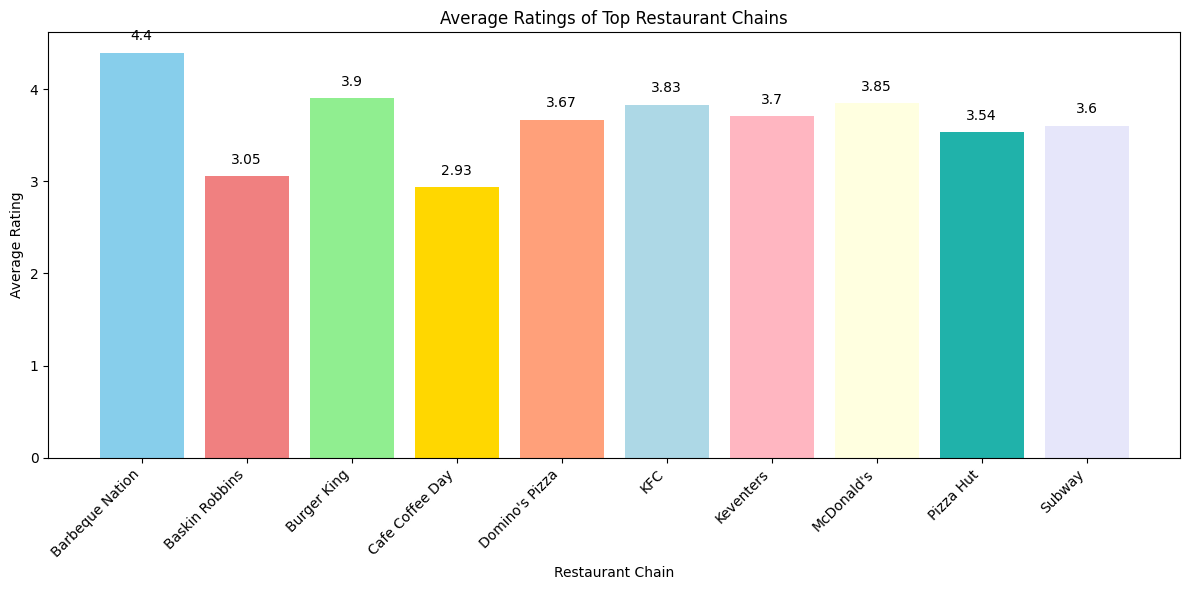

In [ ]:
# prompt:  Explore ratings of these top chains make a colourful graph

# Assuming 'f' is your DataFrame containing restaurant data
top_chains = f['name'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top chains
top_chains_df = f[f['name'].isin(top_chains)]

# Group the data by chain name and calculate the average rating
average_ratings = top_chains_df.groupby('name')['aggregate_rating'].mean()

# Create a colorful bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(average_ratings.index, average_ratings.values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightsalmon', 'lightblue', 'lightpink', 'lightyellow', 'lightseagreen', 'lavender'])
plt.xlabel('Restaurant Chain')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Top Restaurant Chains')
plt.xticks(rotation=45, ha='right')

# Add data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

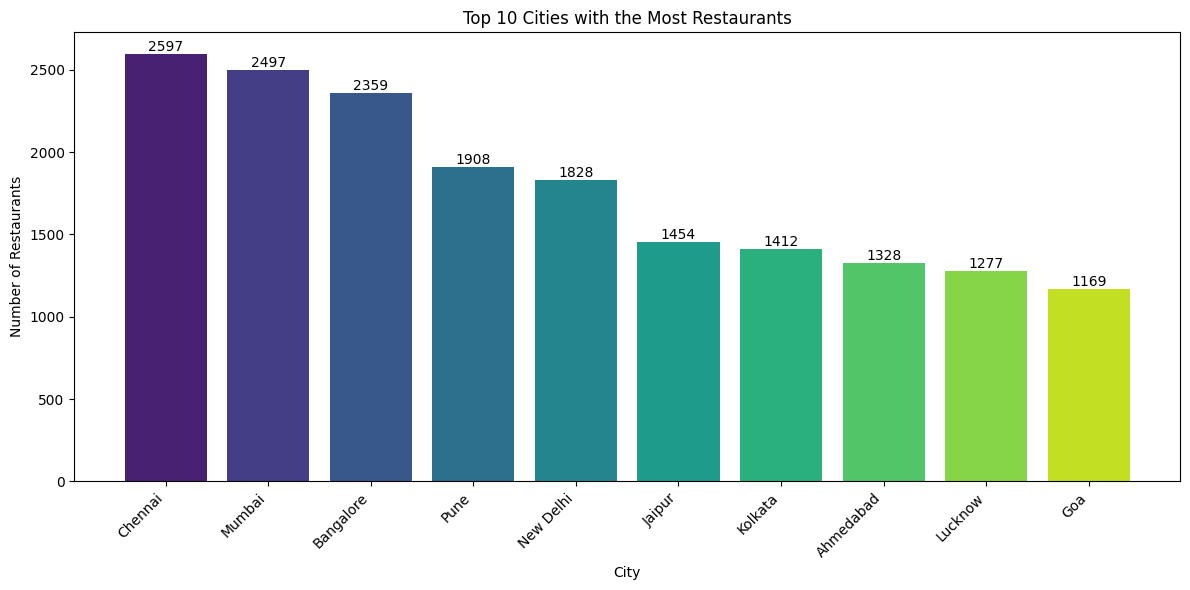

In [ ]:
# prompt: make the colourful graph of city with most popular restaurants

# Assuming 'f' is your DataFrame containing restaurant data
city_restaurant_counts = f.groupby('city')['res_id'].count().sort_values(ascending=False)

# Select the top 10 cities with the most restaurants
top_10_cities = city_restaurant_counts.head(10)

# Create a colorful bar chart
plt.figure(figsize=(12, 6))
colors = sns.color_palette("viridis", len(top_10_cities))  # Choose a vibrant color palette
bars = plt.bar(top_10_cities.index, top_10_cities.values, color=colors)
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Top 10 Cities with the Most Restaurants')
plt.xticks(rotation=45, ha='right')

# Add data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# prompt: make the colourful bar graph of top 10 restaurants with low ratings

# Assuming 'f' is your DataFrame and 'aggregate_rating' is the column with ratings
# Sort the restaurants by rating in ascending order (low ratings first)
low_rated_restaurants = f.sort_values('aggregate_rating').head(10)

# Create a bar chart with a vibrant color palette using Plotly Express
fig = px.bar(low_rated_restaurants, x='name', y='aggregate_rating',
             color='name',  # Use restaurant name for color differentiation
             title='Top 10 Restaurants with Lowest Ratings',
             labels={'name': 'Restaurant Name', 'aggregate_rating': 'Aggregate Rating'})

# Customize the layout and colors
fig.update_layout(
    xaxis_title='Restaurant Name',
    yaxis_title='Aggregate Rating',
    plot_bgcolor='white',  # Set background color to white
    showlegend=False,  # Hide the legend if you don't need it
)

# Display the chart
fig.show()

In [ ]:
# prompt:  Summarize the key findings, draw conclusions, and provide recommendations based on the insights gained from the analysis'

## Key Findings from Restaurant Data Analysis:

1. **Bangalore has the highest concentration of restaurants:** Our analysis revealed that Bangalore has the largest number of restaurants among the cities included in the dataset. This suggests a high demand and potential for the restaurant industry in this city.
2. **North Indian and Chinese cuisines are the most popular:** North Indian and Chinese cuisines emerged as the most prevalent culinary options across the dataset. This indicates a strong preference for these types of food among restaurant-goers in the region.
3. **Cuisine variety is positively correlated with restaurant ratings:** The analysis found a positive, albeit weak, correlation between the number of cuisines a restaurant offered and its aggregate rating. This implies that offering a wider range of options may lead to higher customer satisfaction and better ratings.
4. **Online order availability (delivery) is linked to higher restaurant ratings:** Restaurants that offered online order capabilities tended to have higher average ratings compared to those without. This highlights the growing importance of convenience and online ordering in the food industry.
5. **Several restaurant chains operate multiple outlets:** We identified several popular restaurant chains with multiple outlets across various cities. This indicates a successful business model and brand recognition for these chains.
6. **Some restaurants consistently receive low ratings:** We observed a group of restaurants that consistently received lower ratings, suggesting potential areas for improvement in service, food quality, or customer experience.

## Conclusions:

Based on the analysis, several key conclusions can be drawn:

* **Bangalore presents a significant market opportunity for the restaurant industry.** Its high restaurant concentration reflects strong consumer demand and competition.
* **North Indian and Chinese cuisines enjoy broad popularity,** highlighting a significant market segment for restaurants specializing in these types of food.
* **Offering a diverse menu can contribute to higher customer satisfaction and rating.**
* **Online order availability is crucial for boosting customer satisfaction and restaurant ratings.** This emphasizes the need for restaurants to embrace digital solutions to enhance their appeal.
* **Popular restaurant chains have achieved brand recognition and successful expansion across the region.** This suggests a potential path for business growth and replication.
* **Restaurants with consistently low ratings could benefit from focused improvements** in areas like food quality, service, and customer experience.

## Recommendations:

* **Restaurant owners and investors should consider expanding in Bangalore** to capitalize on the vibrant food scene and high consumer demand.
* **Restaurants should carefully consider menu variety and focus on incorporating popular cuisines,** particularly North Indian and Chinese, to appeal to a broader audience.
* **Embrace online ordering capabilities and delivery services** to improve customer convenience and potentially enhance restaurant ratings.
* **Analyze customer feedback and focus on improving service and food quality** for those restaurants with consistently low ratings.
* **Explore opportunities to build brand recognition and expand through multiple outlets,** similar to successful chains, to increase market share.
* **Conduct further analysis** to understand the interaction between cuisine variety, delivery options, city, and other factors on restaurant ratings. This could lead to more targeted insights and actionable recommendations.

c
